# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 570


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
# for i, city in enumerate(cities[0:50]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Step 5: Extraction
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure") 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    # sleep for 1 second
    time.sleep(1)             
# Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colonia menno
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | gagarin
Processing Record 4 of Set 1 | rongelap
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | brookings
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | ust'-barguzin
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | huarmey
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | puerto madryn
Processing Record 14 of Set 1 | amungan
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | viqueque
Processing Record 17 of Set 1 | isla mujeres
Processing Record 18 of Set 1 | mingora
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | mynamak

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           541
Lng           541
Max Temp      541
Humidity      541
Pressure      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,colonia menno,-22.3667,-59.8167,32.04,34.0,1004.0,3.0,6.36,PY,1.718410e+09
1,wailua homesteads,22.0669,-159.3780,26.53,70.0,1019.0,91.0,2.24,US,1.718410e+09
2,gagarin,55.5529,34.9954,12.78,86.0,1014.0,60.0,0.96,RU,1.718410e+09
3,rongelap,11.1635,166.8941,28.03,77.0,1013.0,31.0,7.38,MH,1.718410e+09
4,adamstown,-25.0660,-130.1015,20.40,66.0,1021.0,66.0,2.94,PN,1.718409e+09


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,colonia menno,-22.3667,-59.8167,32.04,34.0,1004.0,3.0,6.36,PY,1.718410e+09
1,wailua homesteads,22.0669,-159.3780,26.53,70.0,1019.0,91.0,2.24,US,1.718410e+09
2,gagarin,55.5529,34.9954,12.78,86.0,1014.0,60.0,0.96,RU,1.718410e+09
3,rongelap,11.1635,166.8941,28.03,77.0,1013.0,31.0,7.38,MH,1.718410e+09
4,adamstown,-25.0660,-130.1015,20.40,66.0,1021.0,66.0,2.94,PN,1.718409e+09


In [12]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 569
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        570 non-null    object 
 1   Lat         541 non-null    float64
 2   Lng         541 non-null    float64
 3   Max Temp    541 non-null    float64
 4   Humidity    541 non-null    float64
 5   Pressure    541 non-null    float64
 6   Cloudiness  541 non-null    float64
 7   Wind Speed  541 non-null    float64
 8   Country     539 non-null    object 
 9   Date        541 non-null    float64
dtypes: float64(8), object(2)
memory usage: 49.0+ KB


In [13]:
city_data_df.loc[pd.isnull(city_data_df.Lat)]

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
28,taiohae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,kataragama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,guiria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,ahau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,puerto san carlos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,pibor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,'ohonua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,tranovaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# dropping nan data
df_cleaned = city_data_df.dropna(how="any").reset_index()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     539 non-null    int64  
 1   City        539 non-null    object 
 2   Lat         539 non-null    float64
 3   Lng         539 non-null    float64
 4   Max Temp    539 non-null    float64
 5   Humidity    539 non-null    float64
 6   Pressure    539 non-null    float64
 7   Cloudiness  539 non-null    float64
 8   Wind Speed  539 non-null    float64
 9   Country     539 non-null    object 
 10  Date        539 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 46.4+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

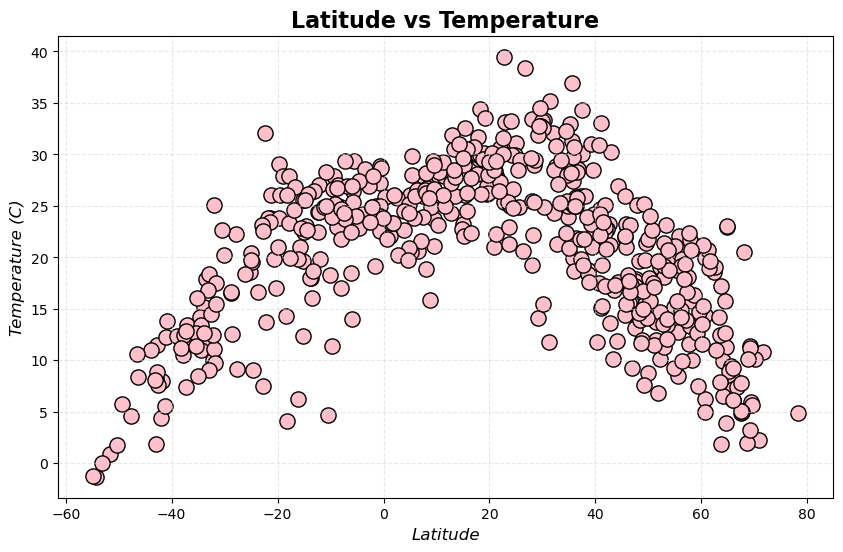

In [15]:
# Step 1: Get the Data
x = df_cleaned.Lat
y = df_cleaned['Max Temp']
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="pink", edgecolor="black",s=120)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (C)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

# plt.xlim(10, 27)
# plt.ylim(0, 650)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
# plt.show()
# Save the figure

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

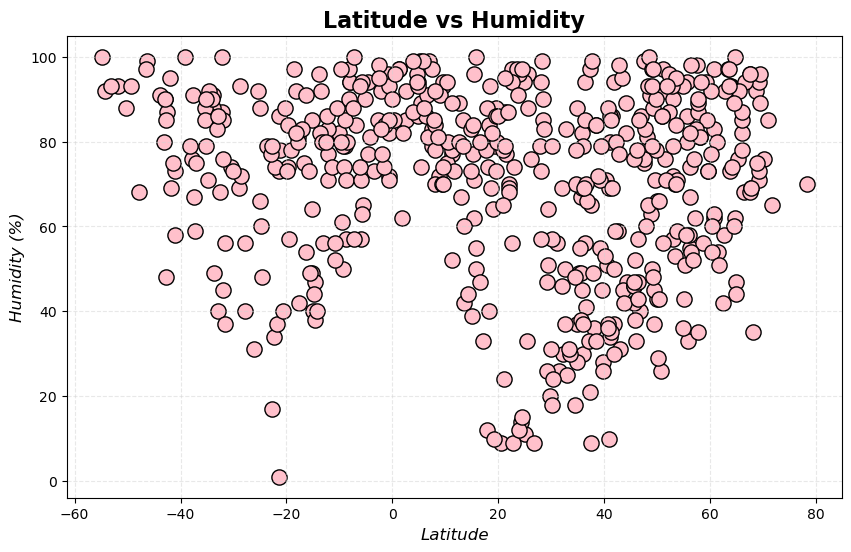

In [16]:
# Step 1: Get the Data
x = df_cleaned.Lat
y = df_cleaned['Humidity']
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="pink", edgecolor="black",s=120)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity (%)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

# plt.xlim(10, 27)
# plt.ylim(0, 650)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
# plt.show()
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

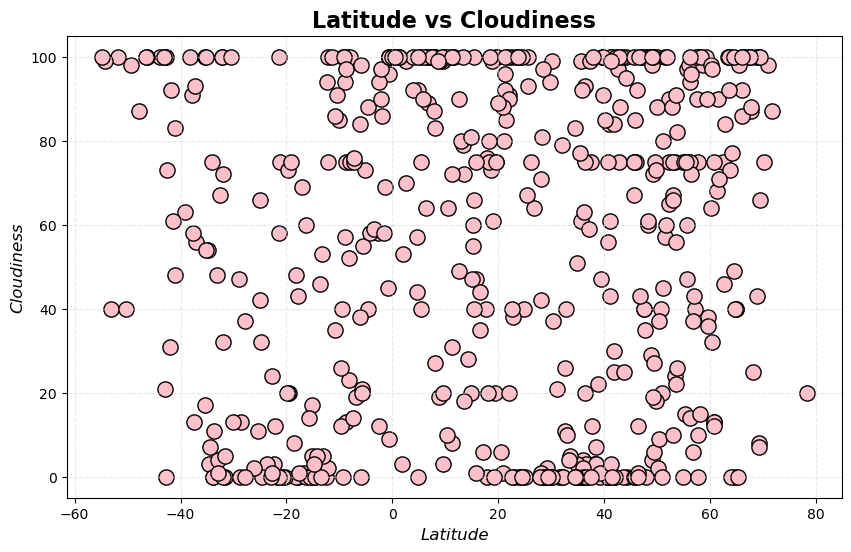

In [17]:
# Step 1: Get the Data
x = df_cleaned.Lat
y = df_cleaned['Cloudiness']
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="pink", edgecolor="black",s=120)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

# plt.xlim(10, 27)
# plt.ylim(0, 650)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
# plt.show()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

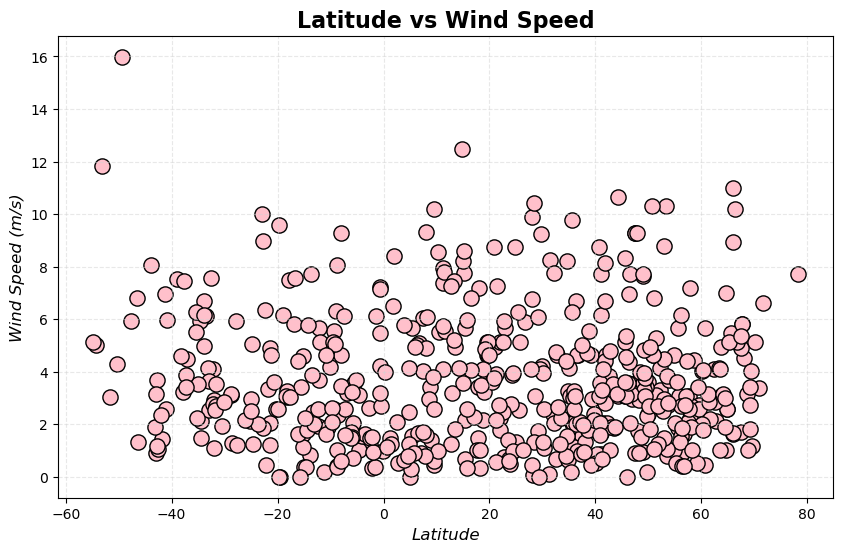

In [18]:
# Step 1: Get the Data
x = df_cleaned.Lat
y = df_cleaned['Wind Speed']
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="pink", edgecolor="black",s=120)

# Step 4: Customizations
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)

# plt.xlim(10, 27)
# plt.ylim(0, 650)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Step 5: Show/Save the graph
# plt.show()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def doRegression(x_value, y_values, x_title, y_title, annotation_pos):
    # USING LINREGRESS
    
    # makes the line of best fit
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept # calculate the predictions
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # make the plot
    # Step 2: Make the canvas
    plt.figure(figsize=(10, 6))
    
    # Step 3: Make the basic plot
    plt.scatter(x_values, y_values, facecolor="firebrick", edgecolor="black", s=100)
    plt.plot(x_values, regress_values, "r-") # plot the line of best fit
    
    # Step 4: Customizations
    plt.xlabel(x_title, fontsize=12, fontstyle="italic")
    plt.ylabel(y_title, fontsize=12, fontstyle="italic")
    plt.title(f"{x_title} vs {y_title}", fontweight="bold", fontsize=16)
    plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
    
    plt.annotate(line_eq, annotation_pos, fontsize=15, color="red")
    
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask1 = df_cleaned.Lat >= 0
northern_hemi_df = df_cleaned.loc[mask1]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
1,1,wailua homesteads,22.0669,-159.3780,26.53,70.0,1019.0,91.0,2.24,US,1.718410e+09
2,2,gagarin,55.5529,34.9954,12.78,86.0,1014.0,60.0,0.96,RU,1.718410e+09
3,3,rongelap,11.1635,166.8941,28.03,77.0,1013.0,31.0,7.38,MH,1.718410e+09
5,5,yellowknife,62.4560,-114.3525,18.56,42.0,1011.0,75.0,4.12,CA,1.718410e+09
6,6,brookings,44.3114,-96.7984,26.92,47.0,1017.0,0.0,3.09,US,1.718409e+09


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask2 = df_cleaned.Lat < 0
southern_hemi_df = df_cleaned.loc[mask2]
# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,0,colonia menno,-22.3667,-59.8167,32.04,34.0,1004.0,3.0,6.36,PY,1.718410e+09
4,4,adamstown,-25.0660,-130.1015,20.40,66.0,1021.0,66.0,2.94,PN,1.718409e+09
10,10,huarmey,-10.0681,-78.1522,18.27,82.0,1014.0,85.0,4.17,PE,1.718410e+09
11,11,ancud,-41.8697,-73.8203,7.98,69.0,1016.0,92.0,1.43,CL,1.718410e+09
12,12,puerto madryn,-42.7692,-65.0385,11.49,48.0,1008.0,0.0,3.67,AR,1.718410e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4974248944210413


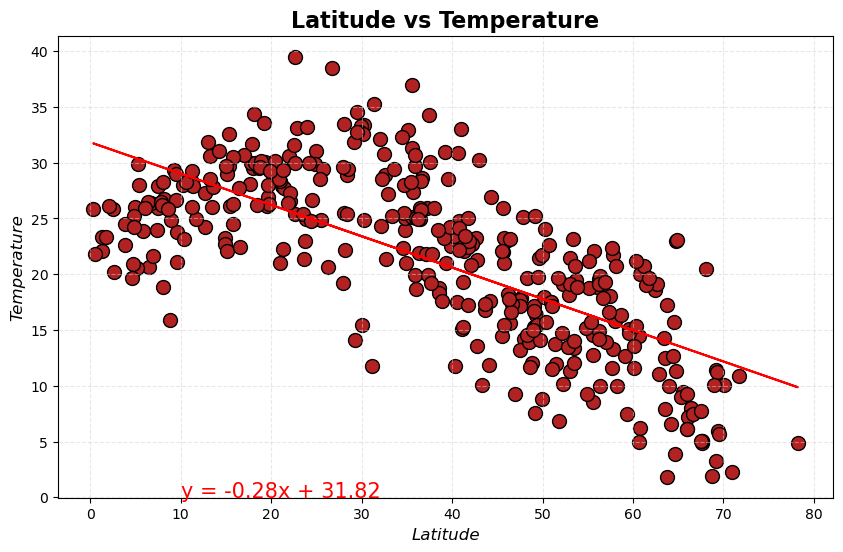

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (10,0))

The r-squared is: 0.6187740165330516


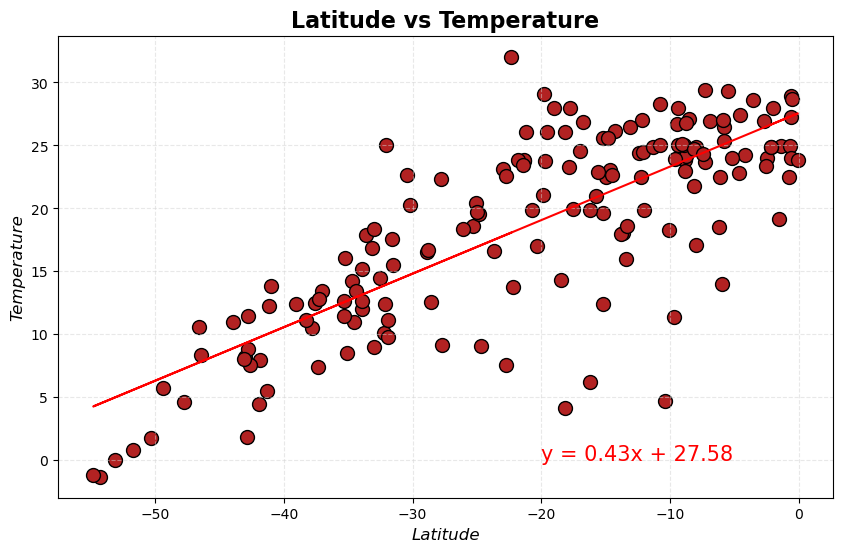

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Max Temp"]
doRegression(x_values, y_values, "Latitude", "Temperature", (-20,0))

**Discussion about the linear relationship: For Nothern Hemisphere Temperature reduces with latitude, while for Southern Hemisphere Temperature increases with latitude

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0010976908278960134


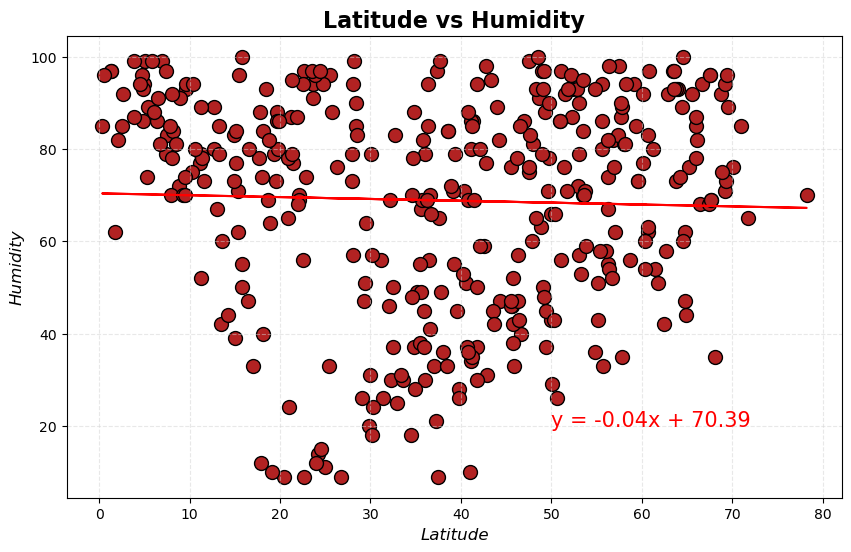

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (50,20))

The r-squared is: 0.001673519904127884


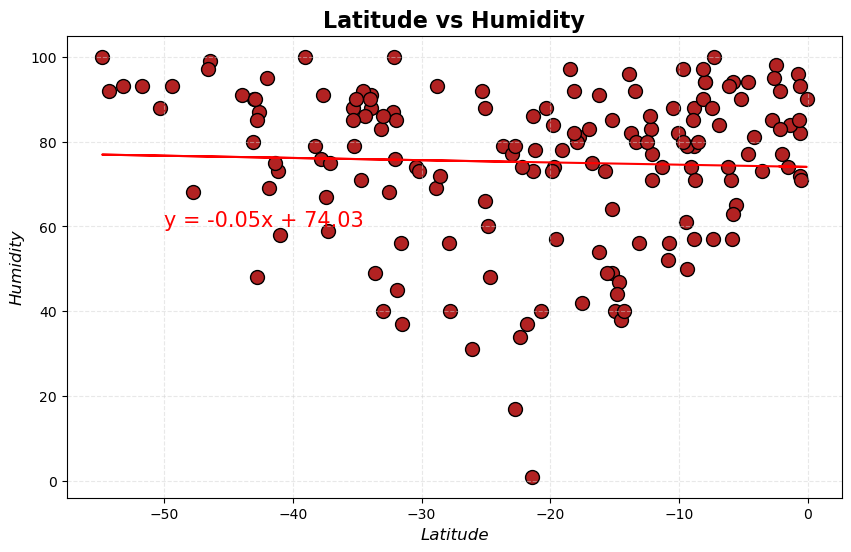

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Humidity"]
doRegression(x_values, y_values, "Latitude", "Humidity", (-50,60))

**Discussion about the linear relationship:  There is no relationship for Nothern Hemisphere and Southern Hemisphere between Humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00014983496357606814


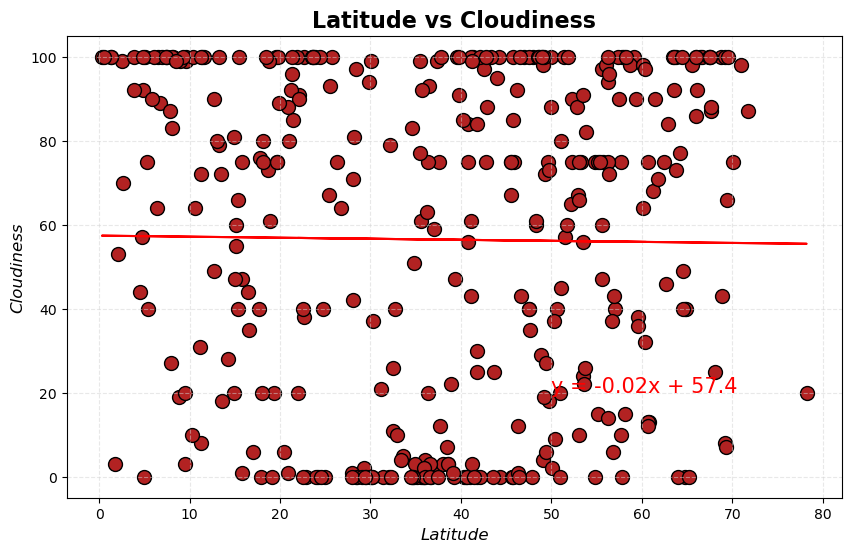

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (50,20))

The r-squared is: 0.002277064225646373


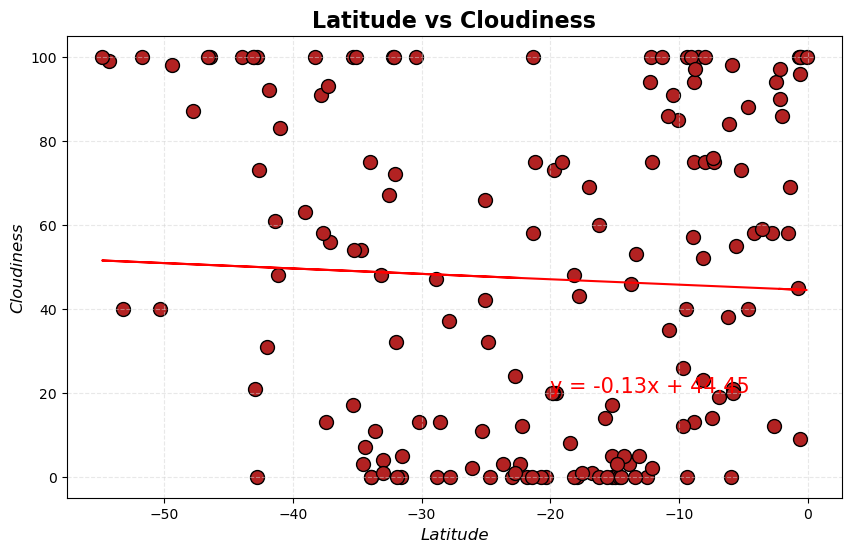

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Cloudiness"]
doRegression(x_values, y_values, "Latitude", "Cloudiness", (-20,20))

**Discussion about the linear relationship:There is no relationship for Nothern Hemisphere and Southern Hemisphere between Cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0009622200594474938


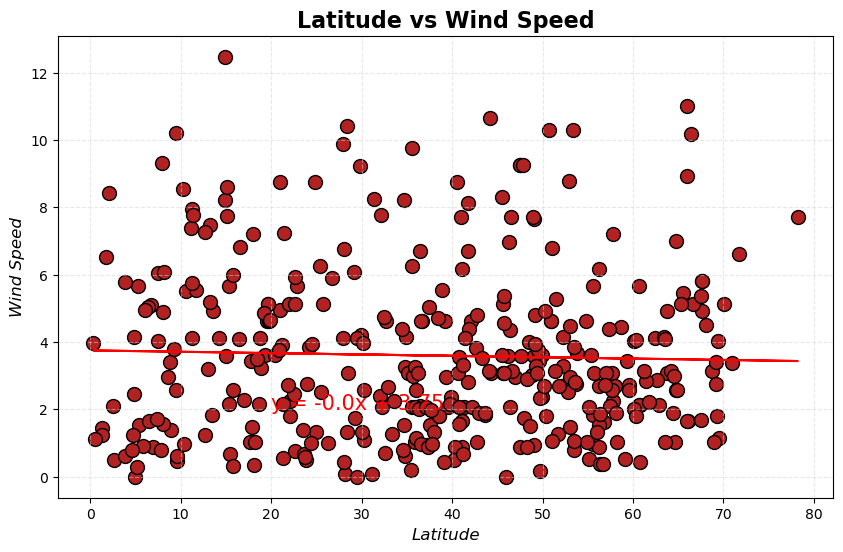

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df.Lat
y_values = northern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (20,2))

The r-squared is: 0.06498876140776169


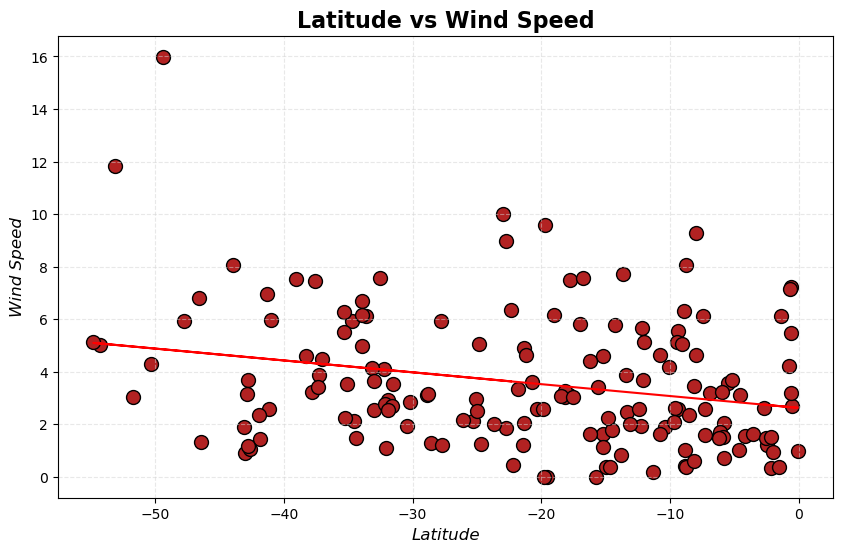

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df.Lat
y_values = southern_hemi_df["Wind Speed"]
doRegression(x_values, y_values, "Latitude", "Wind Speed", (-20,20))

**Discussion about the linear relationship:There is no relationship for Nothern Hemisphere and Southern Hemisphere between Wind Speed and latitude